In [13]:
import numpy as np

class ABCD:
    """
    ABCD matrix method
    """

    def __init__(self, freq, length, alpha, beta, couplingCapacitance, charImpedance, loadResistance=50):
        self.freq = freq
        self.length = length
        self.gamma = alpha + 1j*beta
        self.couplingCapacitance = couplingCapacitance
        self.charImpedance = charImpedance
        self.loadResistance = loadResistance
        
        self.s21 = self.s21(self.abcd(
            self.input(self.freq, self.couplingCapacitance),
            self.transmission(self.freq, self.length, self.gamma, self.charImpedance),
            self.output(self.freq, self.couplingCapacitance)),
            self.loadResistance)

    def input(self, freq, couplingCapacitance):
        n=np.size(freq)
        Zin = 1/(1j*freq*couplingCapacitance)
        return np.append(np.ones(n),[np.zeros(n),Zin,np.ones(n)]).reshape(n,2,2,order='F')
        
    def output(self, freq, couplingCapacitance):
        n=np.size(freq)
        Zin = 1/(1j*freq*couplingCapacitance)
        return np.append(np.ones(n),[np.zeros(n),Zin,np.ones(n)]).reshape(n,2,2,order='F')
        
    def transmission(self, freq, length, gamma, charImpedance):
        n=np.size(freq)
        t11 = np.cosh(gamma * length)
        t12 = charImpedance * np.sinh(gamma * length)
        t21 = (1/charImpedance) * np.sinh(gamma * length)
        t22 = np.cosh(gamma * length)
        return np.append(t11*np.ones(n),[t21*np.ones(n),t12*np.ones(n),t22*np.ones(n)]).reshape(n,2,2,order='F')
    
    def abcd(self, input, transmission, output):
        return input*transmission*output
    
    def s21(self, pABCD, loadResistance):
        A = pABCD[:,0,0]
        B = pABCD[:,0,1]
        C = pABCD[:,1,0]
        D = pABCD[:,1,1]
        RL = loadResistance
        return 2/( A + (B/RL)+ (C*RL) + D )

In [103]:
import numpy as np

freq = np.arange(0,10,0.01)*1e09
length = 8e-03
alpha = 2.4e-04
beta = 60
Ck = 1e-12
Z0 = 50

tl = ABCD(freq, length, alpha, beta, Ck, Z0, loadResistance=50)

s21 = 20*np.log10(tl.s21)

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


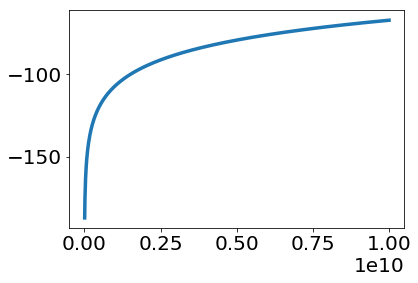

In [104]:
from matplotlib import pyplot as plt

plt.plot(freq,s21)
plt.show()

In [48]:
np.shape(s21)

(1000,)